In [ ]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [20]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions

**Importing the dataset**

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
label = LabelEncoder()
label.fit(df['Gender'])
df['Gender'] = label.transform(df['Gender'])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [6]:
X = df[['Gender','Age','EstimatedSalary']]
Y = df[['Purchased']]

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=20)

**Feature Scaling**

In [31]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [32]:
log = LogisticRegression()
log.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

**Step 3 | Predection**

In [33]:
y_pred = log.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [34]:
r1 = pd.DataFrame(y_test,columns=['Y_test'])
r2 = pd.DataFrame(y_pred,columns=['Y_pred'])
result = pd.concat((r1,r2),axis=1)
result

,Y_test,Y_pred
0,NaN,0.0
1,NaN,1.0
2,NaN,0.0
3,NaN,0.0
4,NaN,0.0
...,...,...
383,NaN,NaN
389,NaN,NaN
391,NaN,NaN
392,NaN,NaN


**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [35]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[69,  1],
       [19, 31]])

**Visualization**

Text(42.0, 0.5, 'Actual')

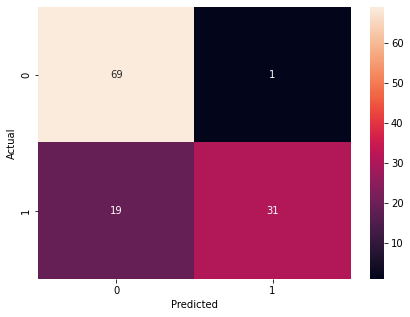

In [36]:
plt.figure(figsize=(7,5))
sn.heatmap(mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


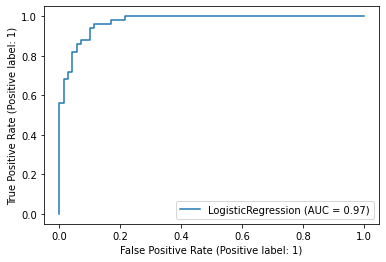

In [37]:
#ROC curve
plot_roc_curve(log,x_test,y_test)

Train Accuracy :  0.6425
Val Accuracy :  0.675


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


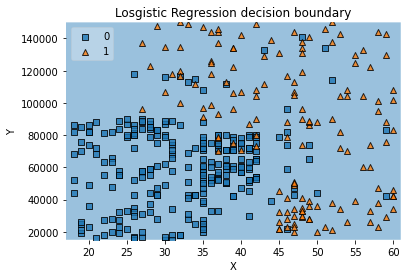

In [54]:
x = df[['Age','EstimatedSalary']].values
y = df['Purchased'].values
clf = LogisticRegression()
clf.fit(x, y)
print("Train Accuracy : ", clf.score(x,y)) 
print("Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))
plot_decision_regions(x, y, clf=clf, legend=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Losgistic Regression decision boundary')
plt.show()